# ADS-505 Team 4 Final Project

Dingyi Duan, Juliet Sieland-Harris, Katie Hu

10/18/2021

### Problem Statement
*Insert Here*

https://github.com/katie-hu/Bank_Marketing

### Import Libraries and Data Set

In [56]:
# Import Libraries

import pandas as pd
import math
import statistics
import seaborn as sns
import datetime
from datetime import date
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm
import random
from matplotlib.pyplot import figure
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary, gainsChart, stepwise_selection, regressionSummary, AIC_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Data Set

bank_df = pd.read_csv('Dataset/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### Predictor Variables
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#### Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")

### Data Cleaning

In [4]:
# Find Number of Columns and Rows in Data Set

bank_df.shape

(4521, 17)

In [5]:
# Find Type of Variables

bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
# Descriptive Statistics

bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
# Column Names

bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# Find any missing values

bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# Create new dataframe that will be cleaned

bank = pd.DataFrame(data = bank_df)

In [10]:
# Check positive response

print((bank['y'] == 'yes').sum())

# Check for response rate

print(100*(bank['y'] == 'yes').sum() / len(bank))

521
11.523999115239992


In [11]:
# Change all yes and no to binary 0,1 values

bank['y'] = (bank['y']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['default'] = (bank['default']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['housing'] = (bank['housing']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['loan'] = (bank['loan']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [12]:
# Look into distribution of variables
f, axs = plt.subplots(2, 3, figsize = (14,7))

sns.histplot(data = bank, x = 'age', ax = axs[0,0])
sns.histplot(data = bank, x = 'default', ax = axs[0,1])
sns.histplot(data = bank, x = 'balance', ax = axs[0,2])
sns.histplot(data = bank, x = 'housing', ax = axs[1,0])
sns.histplot(data = bank, x = 'loan', ax = axs[1,1])
sns.histplot(data = bank, x = 'contact', ax = axs[1,2])


plt.tight_layout()

In [13]:
#Look into distribution of variables
f, axs = plt.subplots(2, 3, figsize = (14,7))

sns.histplot(data = bank, x = 'duration', ax = axs[0,0])
sns.histplot(data = bank,x = 'campaign', ax = axs[0,1])
sns.histplot(data = bank, x = 'pdays', ax = axs[0,2])
sns.histplot(data = bank, x = 'previous', ax = axs[1,0])
sns.histplot(data = bank, x = 'y', ax = axs[1,1])

plt.tight_layout()

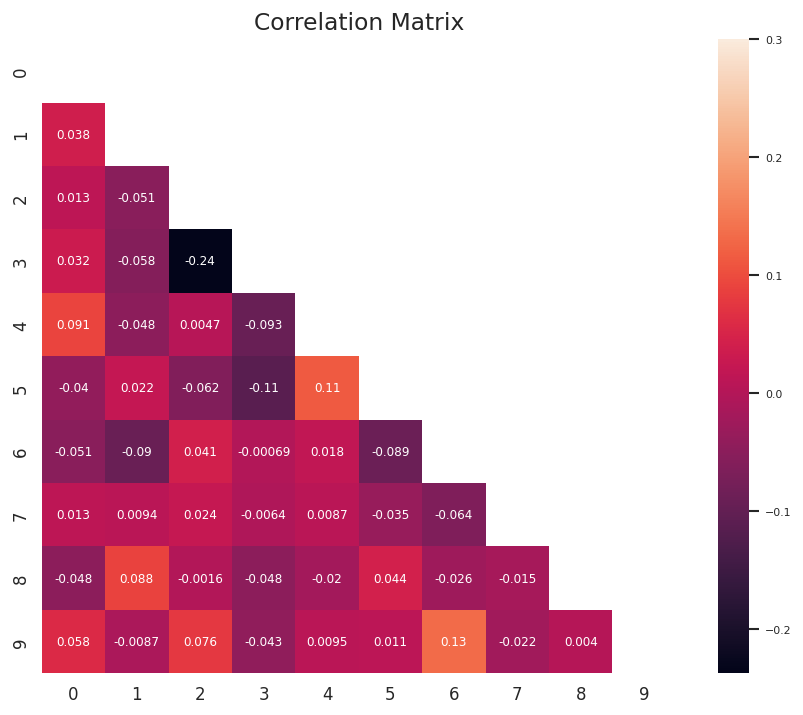

In [14]:
# Find which variables have the highest correlation
%matplotlib inline

corr = np.corrcoef(np.random.randn(10,200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (9,7), dpi = 120)
    sns.set(font_scale = .6)
    ax = sns.heatmap(corr, mask = mask, vmax = .3, square = True, annot = True)
    ax.set_title('Correlation Matrix', fontsize = 14)

In [15]:
# Set Up Normalized Bar Plots for categorical variables

# Marital

crosstab_marital = pd.crosstab(bank['marital'], bank['y'])
crosstab_marital_norm = crosstab_marital.div(crosstab_marital.sum(axis = 1), axis = 0)

# Job

crosstab_job = pd.crosstab(bank['job'], bank['y'])
crosstab_job_norm = crosstab_job.div(crosstab_job.sum(axis=1), axis = 0)

# Education

crosstab_education = pd.crosstab(bank['education'], bank['y'])
crosstab_education_norm = crosstab_education.div(crosstab_education.sum(axis=1), axis = 0)

# Contact

crosstab_contact = pd.crosstab(bank['contact'], bank['y'])
crosstab_contact_norm = crosstab_contact.div(crosstab_contact.sum(axis=1), axis = 0)

# Month

crosstab_month = pd.crosstab(bank['month'], bank['y'])
crosstab_month_norm = crosstab_month.div(crosstab_month.sum(axis=1), axis = 0)

# Day

crosstab_day = pd.crosstab(bank['day'], bank['y'])
crosstab_day_norm = crosstab_day.div(crosstab_day.sum(axis=1), axis = 0)

In [16]:
params = {'legend.fontsize': 12,
         'axes.labelsize': 12,
         'axes.titlesize': 12,}
plt.rcParams.update(params)

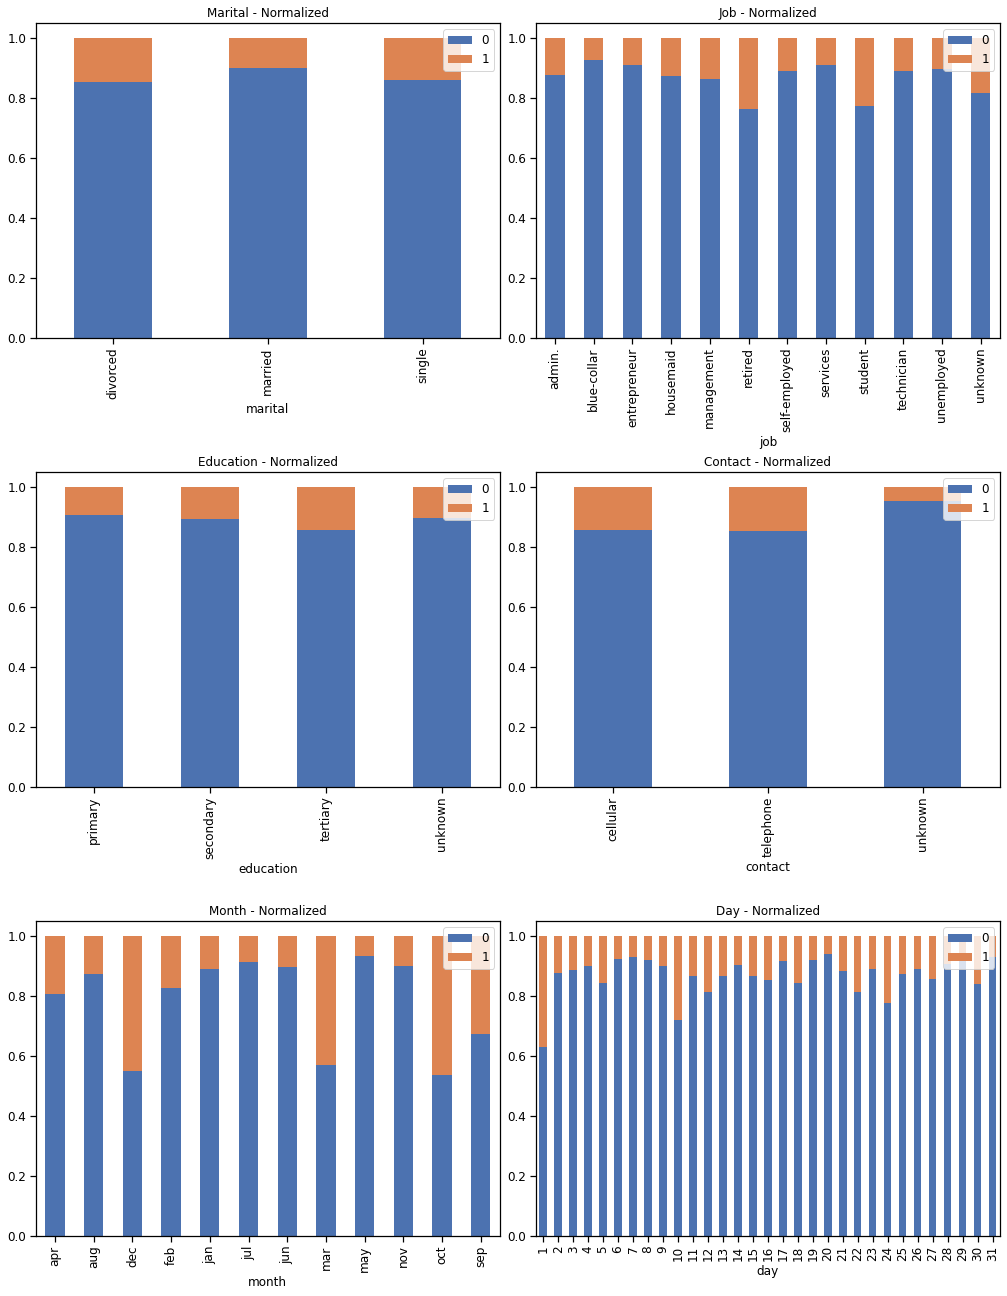

In [17]:
fig = plt.figure(figsize = (14, 18))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

plot_marital = crosstab_marital_norm.plot(kind = 'bar', stacked = True, title = 'Marital - Normalized', fontsize = 12, ax  = ax1)
plot_job = crosstab_job_norm.plot(kind = 'bar', stacked = True, title = 'Job - Normalized', fontsize = 12, ax  = ax2)
plot_education = crosstab_education_norm.plot(kind = 'bar', stacked = True, title = 'Education - Normalized', fontsize = 12, ax  = ax3)
plot_contact = crosstab_contact_norm.plot(kind = 'bar', stacked = True, title = 'Contact - Normalized', fontsize = 12, ax  = ax4)
plot_month = crosstab_month_norm.plot(kind = 'bar', stacked = True, title = 'Month - Normalized', fontsize = 12, ax  = ax5)
plot_day = crosstab_day_norm.plot(kind = 'bar', stacked = True, title = 'Day - Normalized', fontsize = 12, ax  = ax6)

fig.tight_layout(pad = 1)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')
ax4.legend(loc = 'upper right')
ax5.legend(loc = 'upper right')
ax6.legend(loc = 'upper right')

### Add Details

Based on normalized charts, `job`, `month`, `day`, and `education` stand out needing further exploration. 

Variables `month`, `day`, `job` will be binned and `education`is fairly well-balanced which will changed into ordinal values. `contact` will be turned into nominal values.

<AxesSubplot:title={'center':'Binned by Jobs - Normalized'}, xlabel='job'>

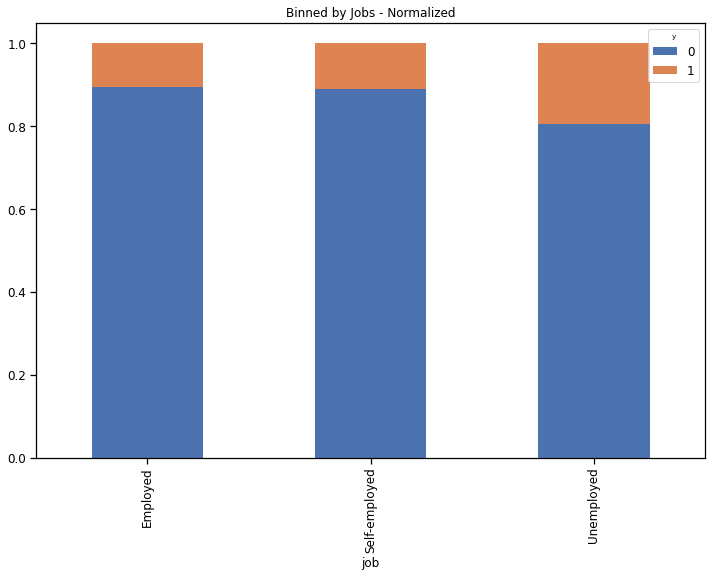

In [18]:
# Bin Jobs into Employed, Unemployed, and Self-Employed
bank['job'] = bank['job'].replace({'management': 'Employed', 'blue-collar': 'Employed',
                                 'technician': 'Employed', 'admin.': 'Employed',
                                 'services': 'Employed', 'retired': 'Unemployed',
                                 'self-employed': 'Self-employed', 'entrepreneur':'Employed',
                                 'unemployed': 'Unemployed', 'housemaid': 'Employed',
                                 'student': 'Unemployed', 'unknown': 'Employed'})

# Normalized Job by Bins Chart

crosstab_job = pd.crosstab(bank['job'], bank['y'])
crosstab_job_norm = crosstab_job.div(crosstab_job.sum(axis=1), axis = 0)
crosstab_job_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Jobs - Normalized', fontsize = 12, figsize = (12, 8))

<AxesSubplot:title={'center':'Binned by Days - Normalized'}, xlabel='day'>

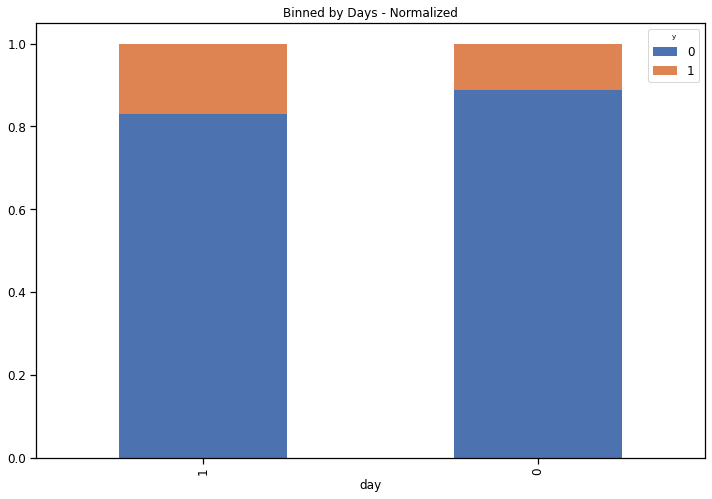

In [19]:
# Change Days to First Day of the Month and All Other Days

b_day = [1, 2, 999]
l_day = ['1', '0']

bank['day'] = pd.to_numeric(bank['day'])
bank['day'] = pd.cut(bank['day'], bins = b_day, labels = l_day, include_lowest = True)

# Normalized Day by Bins Chart

crosstab_day = pd.crosstab(bank['day'], bank['y'])
crosstab_day_norm = crosstab_day.div(crosstab_day.sum(axis=1), axis = 0)
crosstab_day_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Days - Normalized', fontsize = 12, figsize = (12, 8))

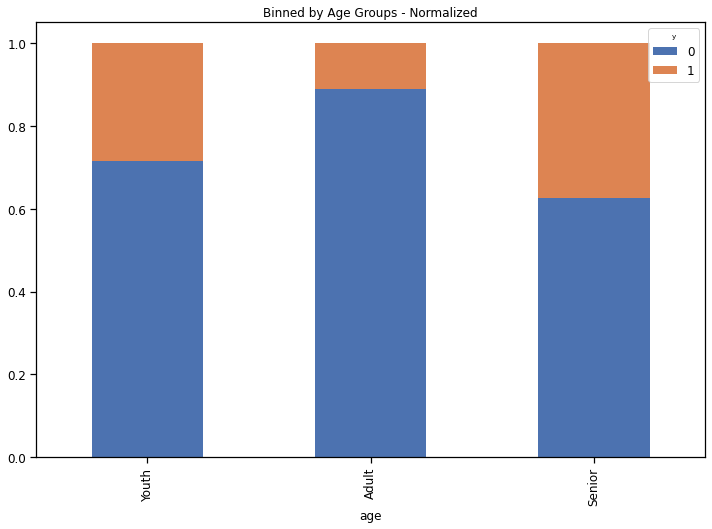

In [20]:
# Change age into groups based on range

b_age = [0, 21, 65, 99999]
l_age = ['Youth', 'Adult', 'Senior']

bank['age'] = pd.to_numeric(bank['age'])
bank['age'] = pd.cut(bank['age'], bins = b_age, labels = l_age, include_lowest = True)

# Normalized Day by Bins Chart

crosstab_age = pd.crosstab(bank['age'], bank['y'])
crosstab_age_norm = crosstab_age.div(crosstab_age.sum(axis=1), axis = 0)
crosstab_age_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Age Groups - Normalized', fontsize = 12, figsize = (12, 8))

# Convert Categories into Numbers

bank['age'] = bank['age'].replace({'Youth': '0',
                                  'Adult': '1',
                                  'Senior': '2'})

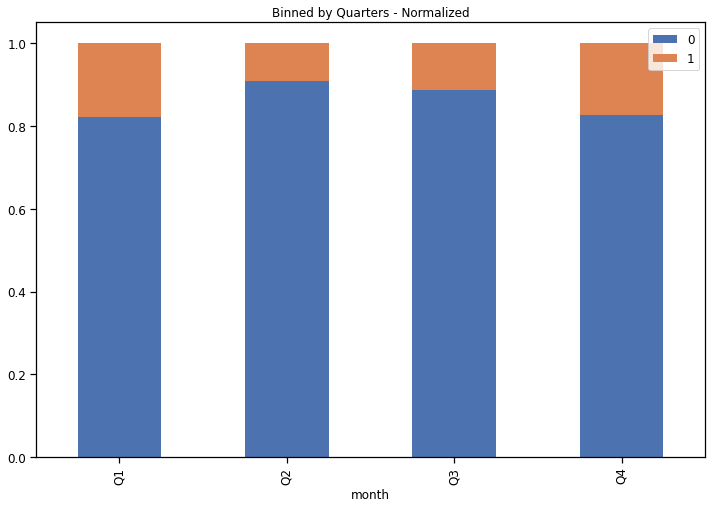

In [21]:
# Change months into groups based on a quarter system

bank['month'] = bank['month'].replace({'jan': '1','feb':'2','mar':'3','apr':'4','may':'5',
                                       'jun':'6','jul':'7','aug':'8','sep':'9','oct':'10',
                                       'nov':'11','dec':'12'
                                  })

bank['month'] = pd.to_numeric(bank['month'])

b_month = [0, 3, 6, 9, 12]
l_month = ['Q1','Q2','Q3','Q4']

bank['month'] = pd.to_numeric(bank['month'])
bank['month'] = pd.cut(bank['month'], bins = b_month, labels = l_month, include_lowest = True)

# Normalized Month by Bins Chart

crosstab_month = pd.crosstab(bank['month'], bank['y'])
crosstab_month_norm = crosstab_month.div(crosstab_month.sum(axis=1), axis = 0)
crosstab_month_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Quarters - Normalized', fontsize = 12, figsize = (12, 8))

# Convert Categories into Numbers

bank['month'] = bank['month'].replace({'Q1': '1',
                                       'Q2': '2',
                                       'Q3': '3',
                                       'Q4': '4'})

plt.legend(loc = 'upper right')

 `job` and `marital` will be turned into dummy variables.

In [22]:
# Turn categorical variables job and marital into dummy variables

cat_df = bank[['job', 'marital']]
dummy = pd.get_dummies(cat_df)

# Merge back into dataset

bank = pd.concat([bank,dummy], axis = 1)

# Drop job and marital original

bank = bank.drop(['job', 'marital'], axis = 1)

In [23]:
# Change pdays to integer and bins

b = [-1, 0, 99999]
l = ['0', '1']

bank['pdays'].astype(int)
bank['pdays'] = pd.cut(bank['pdays'], bins = b, labels = l, include_lowest = True)


# Change Education Variable to Ordinal

bank['education'] = bank['education'].replace({'primary': '0',
                                              'secondary':'0.25',
                                              'tertiary':'0.5',
                                              'unknown':'1'})
bank['education'].astype(float)


# Change Contact and P Outcome to Nominal Values

bank['contact'] = bank['contact'].replace({'cellular': '0',
                                           'telephone':'1',
                                           'unknown':'2'
                                  })

bank['poutcome'] = bank['poutcome'].replace({'failure': '0',
                                             'other':'1',
                                             'success':'2',
                                             'unknown':'3'
                                  })

In [24]:
# Change Variable of 'y' to 'deposit'

bank = bank.rename(columns = {'y': 'deposit'})

In [25]:
# Set Predictors and Outcome

predictors = list(bank.columns)
outcome = 'deposit'
predictors.remove(outcome)

#### Train, Valid, Test Split Data

Parameters: 
- Train .4
- Valid .35
- Test .25
- Random State 1

In [26]:
# Helper Functions

def confusionMatrices(model, title):
    print(title + ' - training results')
    classificationSummary(train_y, model.predict(train_X))
    print(title + ' - validation results')
    valid_pred = model.predict(valid_X)
    classificationSummary(valid_y, valid_pred)

In [27]:
# Train, Valid, Test Split Data

train, temp = train_test_split(bank, train_size=1700, random_state=1)
valid, test = train_test_split(temp, train_size=1488, random_state=1)

print('Training   : ', train.shape)
print('Validation : ', valid.shape)
print('Test : ', test.shape)

Training   :  (1700, 21)
Validation :  (1488, 21)
Test :  (1333, 21)


In [28]:
# Set Variables

train_X = train.drop(['deposit'], 1)
train_y = train['deposit']

valid_X = valid.drop(['deposit'], 1)
valid_y = valid['deposit']

test_X = test.drop(['deposit'], 1)
test_y = test['deposit']

In [29]:
#Standardization

# train
train_X = StandardScaler().fit_transform(train_X)

# valid
valid_X = StandardScaler().fit_transform(valid_X)

# test
test_X = StandardScaler().fit_transform(test_X)

### Logistic Regression

In [30]:
logit_reg = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 5000)
logit_reg.fit(train_X, train_y)
confusionMatrices(logit_reg, 'Logistic regression')

Logistic regression - training results
Confusion Matrix (Accuracy 0.9047)

       Prediction
Actual    0    1
     0 1470   30
     1  132   68
Logistic regression - validation results
Confusion Matrix (Accuracy 0.8972)

       Prediction
Actual    0    1
     0 1280   37
     1  116   55


### Classification Tree

In [31]:
dTree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30, max_leaf_nodes = 10)
dTree.fit(train_X, train_y)
confusionMatrices(dTree, 'Decision Tree')

Decision Tree - training results
Confusion Matrix (Accuracy 0.9047)

       Prediction
Actual    0    1
     0 1490   10
     1  152   48
Decision Tree - validation results
Confusion Matrix (Accuracy 0.8905)

       Prediction
Actual    0    1
     0 1299   18
     1  145   26


### Bagging

In [32]:
bagging = BaggingClassifier(dTree, max_samples = 0.5, max_features = 0.5)
bagging.fit(train_X, train_y)
confusionMatrices(bagging, 'Bagged Decision Tree')

Bagged Decision Tree - training results
Confusion Matrix (Accuracy 0.8871)

       Prediction
Actual    0    1
     0 1499    1
     1  191    9
Bagged Decision Tree - validation results
Confusion Matrix (Accuracy 0.8884)

       Prediction
Actual    0    1
     0 1314    3
     1  163    8


### Adaboost

In [33]:
adaboost = AdaBoostClassifier(n_estimators = 100, base_estimator = dTree)
adaboost.fit(train_X, train_y)
confusionMatrices(adaboost, 'Boosted Decision Tree')

Boosted Decision Tree - training results
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1500    0
     1    0  200
Boosted Decision Tree - validation results
Confusion Matrix (Accuracy 0.8602)

       Prediction
Actual    0    1
     0 1222   95
     1  113   58


### Random Forest

In [34]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(train_X, train_y)
confusionMatrices(rf, 'Random Forest Classifier')

Random Forest Classifier - training results
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1500    0
     1    0  200
Random Forest Classifier - validation results
Confusion Matrix (Accuracy 0.8858)

       Prediction
Actual    0    1
     0 1279   38
     1  132   39


### Neural Network

#### Option 1

In [35]:
param_grid = {
    'hidden_layer_sizes': list(range(2, 10)),
}
neuralNet1 = MLPClassifier(activation = 'logistic', solver = 'lbfgs', random_state = 1, max_iter = 5000)

gridSearch = GridSearchCV(neuralNet1, param_grid, cv = 5, n_jobs = -1)
gridSearch.fit(train_X, train_y)
neuralNet1 = gridSearch.best_estimator_

confusionMatrices(gridSearch, 'Neural Network')

Neural Network - training results
Confusion Matrix (Accuracy 0.9171)

       Prediction
Actual    0    1
     0 1469   31
     1  110   90
Neural Network - validation results
Confusion Matrix (Accuracy 0.8824)

       Prediction
Actual    0    1
     0 1259   58
     1  117   54


#### Option 2

In [36]:
scaleInput = MinMaxScaler()
scaleInput.fit(train_X * 1.0)

neuralNet2 = MLPClassifier(hidden_layer_sizes = (10), activation = 'logistic', solver = 'lbfgs', max_iter = 5000,
                          random_state = 1)
neuralNet2.fit(scaleInput.transform(train_X), train_y)

print('Neural Network - Training results')
classificationSummary(train_y, neuralNet2.predict(scaleInput.transform(train_X)))
print('Neural Network - Validation results')
classificationSummary(valid_y, neuralNet2.predict(scaleInput.transform(valid_X)))

Neural Network - Training results
Confusion Matrix (Accuracy 0.9476)

       Prediction
Actual    0    1
     0 1478   22
     1   67  133
Neural Network - Validation results
Confusion Matrix (Accuracy 0.8777)

       Prediction
Actual    0    1
     0 1252   65
     1  117   54


### Linear Discriminant Analysis

In [37]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(train_X, train_y)
LDA_confusion = confusionMatrices(LDA, 'Linear Discriminant Analysis')

Linear Discriminant Analysis - training results
Confusion Matrix (Accuracy 0.9041)

       Prediction
Actual    0    1
     0 1448   52
     1  111   89
Linear Discriminant Analysis - validation results
Confusion Matrix (Accuracy 0.8905)

       Prediction
Actual    0    1
     0 1262   55
     1  108   63


### Evaluation Metrics

### Accuracy Score

In [38]:
def accuracy(model):
    
    accuracy_train = accuracy_score(train_y, model.predict(train_X))
    accuracy_valid = accuracy_score(valid_y, model.predict(valid_X))
    
    return round(accuracy_train,3), round(accuracy_valid,3)

print('Accuracy score for Logistic Regression is:', accuracy(logit_reg))
print('Accuracy score for Decision Tree is:', accuracy(dTree))
print('Accuracy score for Bagging is:', accuracy(bagging))
print('Accuracy score for Boosting is:', accuracy(adaboost))
print('Accuracy score for Random Forest is:', accuracy(rf))
print('Accuracy score for Neural Network Option 1 is:', accuracy(gridSearch))
print('Accuracy score for Neural Network Option 2 is:', accuracy(neuralNet2))
print('Accuracy score for Linear Discriminant Analysis is:', accuracy(LDA))

Accuracy score for Logistic Regression is: (0.905, 0.897)
Accuracy score for Decision Tree is: (0.905, 0.89)
Accuracy score for Bagging is: (0.887, 0.888)
Accuracy score for Boosting is: (1.0, 0.86)
Accuracy score for Random Forest is: (1.0, 0.886)
Accuracy score for Neural Network Option 1 is: (0.917, 0.882)
Accuracy score for Neural Network Option 2 is: (0.867, 0.87)
Accuracy score for Linear Discriminant Analysis is: (0.904, 0.89)


### F1 Score

In [39]:
def f1(model):
    
    f1_train = f1_score(train_y, model.predict(train_X), average = 'weighted')
    f1_valid = f1_score(valid_y, model.predict(valid_X), average = 'weighted')
    
    return round(f1_train,2), round(f1_valid,2)

print('F1 score for Logistic Regression is:', f1(logit_reg))
print('F1 score for Decision Tree is:', f1(dTree))
print('F1 score for Bagging is:', f1(bagging))
print('F1 score for Boosting is:', f1(adaboost))
print('F1 score for Random Forest is:', f1(rf))
print('F1 score for Neural Network Option 1 is:', f1(gridSearch))
print('F1 score for Neural Network Option 2 is:', f1(neuralNet2))
print('F1 score for Linear Discriminant Analysis is:', f1(LDA))

F1 score for Logistic Regression is: (0.89, 0.88)
F1 score for Decision Tree is: (0.88, 0.86)
F1 score for Bagging is: (0.84, 0.84)
F1 score for Boosting is: (1.0, 0.86)
F1 score for Random Forest is: (1.0, 0.87)
F1 score for Neural Network Option 1 is: (0.91, 0.87)
F1 score for Neural Network Option 2 is: (0.86, 0.87)
F1 score for Linear Discriminant Analysis is: (0.9, 0.88)


### Gains Chart

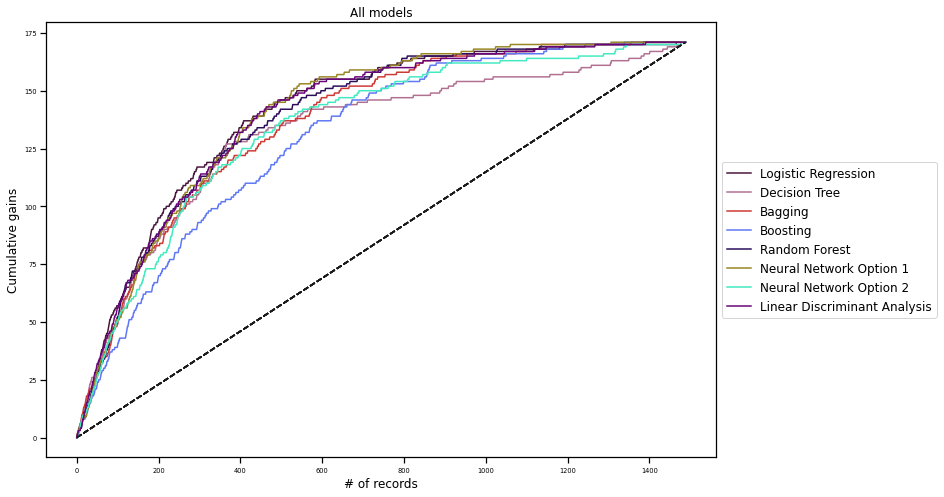

In [40]:
def modelGainsChart(model, title, ax=None):
    
    result = pd.DataFrame({
        'actual': valid_y,  # use validate set
        'prob': model.predict_proba(valid_X)[:, 1]
    })

    result = result.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
    
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    ax = gainsChart(result.actual, label = title, ax=ax, figsize=[12, 8], color = color)
    ax.set_title(title)
    
    return ax



ax = modelGainsChart(logit_reg, 'Logistic Regression')
modelGainsChart(dTree, 'Decision Tree', ax)
modelGainsChart(bagging, 'Bagging', ax)
modelGainsChart(adaboost, 'Boosting', ax)
modelGainsChart(rf, 'Random Forest', ax)
modelGainsChart(gridSearch, 'Neural Network Option 1', ax)
modelGainsChart(neuralNet2, 'Neural Network Option 2', ax)
modelGainsChart(LDA, 'Linear Discriminant Analysis', ax)

ax.set_title('All models')
ax.set_xlabel('# of records')
ax.set_ylabel('Cumulative gains')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### ROC Curve

<Figure size 432x288 with 0 Axes>

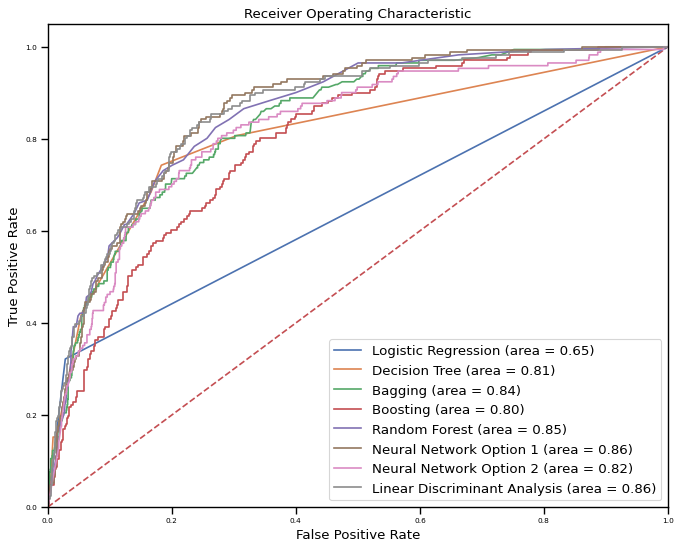

In [41]:
#Logistic Regression
probs_logit_reg = logit_reg.predict_proba(valid_X)
preds_logit_reg = probs_logit_reg[:,1]

# Decision Tree
probs_dTree = dTree.predict_proba(valid_X)
preds_dTree = probs_dTree[:,1]

#Bagging
probs_bagging = bagging.predict_proba(valid_X)
preds_bagging = probs_bagging[:,1]

#Boosting
probs_adaboost = adaboost.predict_proba(valid_X)
preds_adaboost = probs_adaboost[:,1]

# Random Forest
probs_rf = rf.predict_proba(valid_X)
preds_rf = probs_rf[:,1]

# Neural Net Option 1 
probs_neuralNet = gridSearch.predict_proba(valid_X)
preds_neuralNet = probs_neuralNet[:,1]

# Neural Net Option 2
probs_neuralNet2 = neuralNet2.predict_proba(valid_X)
preds_neuralNet2 = probs_neuralNet2[:,1]

# LDA
probs_LDA = LDA.predict_proba(valid_X)
preds_LDA = probs_LDA[:,1]


fpr1, tpr1, threshold1 = roc_curve(valid_y, logit_reg.predict(valid_X))
fpr2, tpr2, threshold2 = metrics.roc_curve(valid_y, preds_dTree)
fpr3, tpr3, threshold3 = metrics.roc_curve(valid_y, preds_bagging)
fpr4, tpr4, threshold4 = metrics.roc_curve(valid_y, preds_adaboost)
fpr5, tpr5, threshold5 = metrics.roc_curve(valid_y, preds_rf)
fpr6, tpr6, threshold6 = metrics.roc_curve(valid_y, preds_neuralNet)
fpr7, tpr7, threshold7 = metrics.roc_curve(valid_y, preds_neuralNet2)
fpr8, tpr8, threshold8 = metrics.roc_curve(valid_y, preds_LDA)


logit_reg_roc_auc = metrics.auc(fpr1, tpr1)
dTree_roc_auc = metrics.auc(fpr2, tpr2)
bagging_roc_auc = metrics.auc(fpr3, tpr3)
adaboost_roc_auc = metrics.auc(fpr4, tpr4)
rf_roc_auc = metrics.auc(fpr5, tpr5)
neuralNet_roc_auc = metrics.auc(fpr6, tpr6)
neuralNet2_roc_auc = metrics.auc(fpr7, tpr7)
LDA_roc_auc = metrics.auc(fpr8, tpr8)

plt.figure()
figure(figsize=(10, 8), dpi=80)
plt.plot([0, 1], [0, 1],'r--')


plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_reg_roc_auc)
plt.plot(fpr2, tpr2, label = 'Decision Tree (area = %0.2f)' % dTree_roc_auc)
plt.plot(fpr3, tpr3, label = 'Bagging (area = %0.2f)' % bagging_roc_auc)
plt.plot(fpr4, tpr4, label = 'Boosting (area = %0.2f)' % adaboost_roc_auc)
plt.plot(fpr5, tpr5, label = 'Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr6, tpr6, label = 'Neural Network Option 1 (area = %0.2f)' % neuralNet_roc_auc)
plt.plot(fpr7, tpr7, label = 'Neural Network Option 2 (area = %0.2f)' % neuralNet2_roc_auc)
plt.plot(fpr8, tpr8, label = 'Linear Discriminant Analysis (area = %0.2f)' % LDA_roc_auc)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Next Steps: Drop Variables, Balance Dataset, Re-Run Models

### Data Pre-Processing

Input Stepwise Regressions to determine what to drop.

In [43]:
# For Logistic Regression

print('regularization', logit_reg.C_)
print('intercept ', logit_reg.intercept_[0])
lr = pd.DataFrame({
    'coeff': logit_reg.coef_[0],
    'abs_coeff': np.abs(logit_reg.coef_[0])
}, index = predictors)
print(lr.sort_values(by=['abs_coeff'], ascending = False))

regularization [21.5443469]
intercept  -2.7175250327687177
                      coeff  abs_coeff
pdays              1.573255   1.573255
poutcome           1.450106   1.450106
duration           1.101764   1.101764
contact           -0.458323   0.458323
loan              -0.289908   0.289908
housing           -0.193215   0.193215
previous           0.159625   0.159625
education          0.143702   0.143702
marital_single     0.117746   0.117746
marital_married   -0.113558   0.113558
job_Unemployed     0.110391   0.110391
age                0.107551   0.107551
job_Self-employed -0.106616   0.106616
day                0.087905   0.087905
balance            0.085452   0.085452
month             -0.050273   0.050273
default            0.043150   0.043150
job_Employed      -0.041047   0.041047
campaign          -0.030727   0.030727
marital_divorced   0.011444   0.011444


In [45]:
train_X1 = train[predictors]
train_y1 = train[outcome]
valid_X1 = valid[predictors]
valid_y1 = valid[outcome]

In [46]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    lr = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 5000)
    return lr.fit(train_X1[variables], train_y)

def score_model(lr, variables):
    if len(variables) == 0:
        return 0
    lr_valid = lr.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in lr_valid])

lr_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
linear_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add age
Step: score=-0.89, unchanged None
['age']


In [51]:
trainD = train.loc[train.deposit == 1]
validD = valid.loc[valid.deposit == 1]
testD = test.loc[test.deposit == 1]

outcome = 'deposit'

train_X2 = trainD[predictors]
train_y2 = trainD[outcome]
valid_X2 = validD[predictors]
valid_y2 = validD[outcome]

In [59]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    model = LinearRegression()
    return model.fit(train_X1[variables], train_y1)

def score_model(model, variables):
    if len(variables) == 0:
        return mean_squared_error(train_y1, [train_y1.mean()] * len(train_y1), model)
    return mean_squared_error(train_y1, model.predict(train_X1[variables]))

model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
model_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.10, constant
Step: score=0.09, add duration
Step: score=0.08, add pdays
Step: score=0.08, add poutcome
Step: score=0.08, add contact
Step: score=0.08, add job_Unemployed
Step: score=0.08, add marital_single
Step: score=0.08, add loan
Step: score=0.08, add housing
Step: score=0.07, add previous
Step: score=0.07, add age
Step: score=0.07, add education
Step: score=0.07, add day
Step: score=0.07, add balance
Step: score=0.07, add job_Employed
Step: score=0.07, add marital_divorced
Step: score=0.07, add default
Step: score=0.07, add campaign
Step: score=0.07, add month
Step: score=0.07, add job_Self-employed
Step: score=0.07, add marital_married
Step: score=0.07, unchanged None
['duration', 'pdays', 'poutcome', 'contact', 'job_Unemployed', 'marital_sin

In [47]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    dt = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30, max_leaf_nodes = 10)
    return dt.fit(train_X1[variables], train_y)

def score_model(dt, variables):
    if len(variables) == 0:
        return 0
    dt_valid = dt.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in dt_valid])

dt_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
dt_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add poutcome
Step: score=-0.89, add balance
Step: score=-0.89, unchanged None
['poutcome', 'balance']


In [48]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    bg = BaggingClassifier(dTree, max_samples = 0.5, max_features = 0.5)
    return bg.fit(train_X1[variables], train_y)

def score_model(bg, variables):
    if len(variables) == 0:
        return 0
    bg_valid = bg.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in bg_valid])

bg_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
bg_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add poutcome
Step: score=-0.89, unchanged None
['poutcome']


In [49]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    bo = AdaBoostClassifier(n_estimators = 100, base_estimator = dTree)
    return bo.fit(train_X1[variables], train_y)

def score_model(bo, variables):
    if len(variables) == 0:
        return 0
    bo_valid = bo.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in bo_valid])

bo_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
bo_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add poutcome
Step: score=-0.89, add education
Step: score=-0.89, unchanged None
['poutcome', 'education']


In [50]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    rfc = RandomForestClassifier(n_estimators = 100, random_state = 1)
    return rfc.fit(train_X1[variables], train_y)

def score_model(rfc, variables):
    if len(variables) == 0:
        return 0
    rfc_valid = rfc.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in rfc_valid])

rfc_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
rfc_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add poutcome
Step: score=-0.89, unchanged None
['poutcome']


### Drop Variables

### Balance Dataset

In [60]:
bank['deposit'].value_counts()

0    4000
1     521
Name: deposit, dtype: int64

In [61]:
train.deposit.value_counts()

0    1500
1     200
Name: deposit, dtype: int64

In [62]:
to_resample = train.loc[train['deposit'] == 1]

In [63]:
# Rebalanced from 11% to 30%

our_resample = to_resample.sample(n = 442, replace = True)

In [64]:
train_rebal = pd.concat([train, our_resample])

train_rebal['deposit'].value_counts()

0    1500
1     642
Name: deposit, dtype: int64

In [65]:
train_XR = train_rebal[predictors]
train_yR = train_rebal[outcome]



logit_reg_rebal = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 5000)
logit_reg_rebal.fit(train_XR, train_yR)
confusionMatrices(logit_reg_rebal, 'Logistic regression')

Logistic regression - training results
Confusion Matrix (Accuracy 0.8206)

       Prediction
Actual    0    1
     0 1321  179
     1  126   74
Logistic regression - validation results
Confusion Matrix (Accuracy 0.8112)

       Prediction
Actual    0    1
     0 1153  164
     1  117   54


In [69]:
rf_rebal = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf_rebal.fit(train_XR, train_yR)
confusionMatrices(rf_rebal, 'Random Forest Classifier')

Random Forest Classifier - training results
Confusion Matrix (Accuracy 0.8824)

       Prediction
Actual    0    1
     0 1500    0
     1  200    0
Random Forest Classifier - validation results
Confusion Matrix (Accuracy 0.8851)

       Prediction
Actual    0    1
     0 1317    0
     1  171    0


In [70]:
param_grid = {
    'hidden_layer_sizes': list(range(2, 10)),
}
neuralNet_rebal = MLPClassifier(activation = 'logistic', solver = 'lbfgs', random_state = 1, max_iter = 5000)

gridSearch_rebal = GridSearchCV(neuralNet_rebal, param_grid, cv = 5, n_jobs = -1)
gridSearch_rebal.fit(train_XR, train_yR)
neuralNet_rebal = gridSearch_rebal.best_estimator_

confusionMatrices(gridSearch_rebal, 'Neural Network')

Neural Network - training results
Confusion Matrix (Accuracy 0.8724)

       Prediction
Actual    0    1
     0 1460   40
     1  177   23
Neural Network - validation results
Confusion Matrix (Accuracy 0.8844)

       Prediction
Actual    0    1
     0 1293   24
     1  148   23


In [71]:
def accuracy(model_rebal):
    
    accuracy_train_rebal = accuracy_score(train_yR, model_rebal.predict(train_XR))
    
    return round(accuracy_train_rebal,3)

print('Accuracy score for Rebalanced Logistic Regression is:', accuracy(logit_reg_rebal))
print('Accuracy score for Rebalanced Neural Network is:', accuracy(gridSearch_rebal))

Accuracy score for Rebalanced Logistic Regression is: 0.825
Accuracy score for Rebalanced Neural Network is: 0.828


In [72]:
def f1(model_rebal):
    
    f1_train_rebal = f1_score(train_yR, model_rebal.predict(train_XR), average = 'weighted')
    
    return round(f1_train_rebal,2)

print('F1 score for Rebalanced Logistic Regression is:', f1(logit_reg_rebal))
print('F1 score for Rebalanced Neural Network is:', f1(gridSearch_rebal))

F1 score for Rebalanced Logistic Regression is: 0.82
F1 score for Rebalanced Neural Network is: 0.83


In [74]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    logit_reg_rebal = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 5000)
    return logit_reg_rebal.fit(train_XR[variables], train_yR)

def score_model(lr, variables):
    if len(variables) == 0:
        return 0
    lr_valid = lr.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in lr_valid])

logit_reg_rebal_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
logit_reg_rebal_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add education
Step: score=-0.89, unchanged None
['education']
